In [3]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import Timer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline  
import analyse_fBm
import simulation_fBm

# Plot of 3 trajectories with different alpha

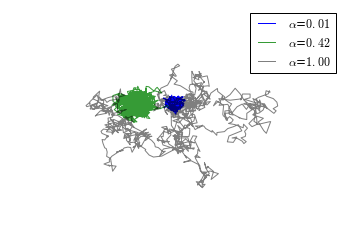

In [4]:
fig = plt.figure()
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
ax=plt.axes(projection='3d')
ax.set_axis_off()
ain=1
for i in (np.logspace(0.02,1.0,num=3,base=2)-1):
    e=analyse_fBm.Analyse(D=1,particles=3,length=1000,alpha=i,dt=1.0,version='lowen')
    a=e.compute_trajectory()
    plt.plot(a[0],a[1],a[2],color=colors[ain],alpha=1-e.alpha/2, label="$\\alpha $=$%.2f $" %(e.alpha))
    ain=ain+1
plt.legend()
plt.savefig('results/trajectories_differentalpha.png',dpi=300)   # save the figure to file 


# Alogithmic scaling

In [5]:
aneu=np.logspace(1,8.5,num=16,base=2)
time_n=[]
for i in aneu[1:]:
    #print int(i)
    timen=Timer(lambda: analyse_fBm.Analyse(D=2,particles=1,length=int(i),alpha=0.5,dt=1,version='pseudo-cholesky').compute_trajectory())
    time_n.append(timen.timeit(number=1))

In [6]:
time_python1=[]
time_cpp1=[]
time_b1=[]
time_a1=[]
time_n1=[]
time_lowen_modified=[]
a1=np.logspace(1,10,num=10,base=2)
for i in a1:
    #print int(i)
    timec=Timer(lambda: analyse_fBm.Analyse(D=2,particles=int(i),length=1000,alpha=0.5,dt=1,version='naive_cpp').compute_trajectory())
    timen=Timer(lambda: analyse_fBm.Analyse(D=2,particles=int(i),length=128,alpha=0.5,dt=1,version='pseudo-cholesky').compute_trajectory())
    timep=Timer(lambda: analyse_fBm.Analyse(D=2,particles=int(i),length=1000,alpha=0.5,dt=1,version='naive_python').compute_trajectory())
    timeb=Timer(lambda: analyse_fBm.Analyse(D=2,particles=int(i),length=1000,alpha=0.5,dt=1,version='lowen').compute_trajectory())
    timelowencpp=Timer(lambda: analyse_fBm.Analyse(D=2,particles=int(i),length=1000,alpha=0.5,dt=1,version='lowencpp').compute_trajectory())  
    timelowenmodified=Timer(lambda: analyse_fBm.Analyse(D=2,particles=int(i),length=1000,alpha=0.5,dt=1,version='lowen_modified').compute_trajectory())  
    time_n1.append(timen.timeit(number=1)*3)
    time_python1.append(timep.timeit(number=1)*3)
    time_cpp1.append(timec.timeit(number=1))
    time_b1.append(timeb.timeit(number=1)*3)
    time_a1.append(timelowencpp.timeit(number=1))
    time_lowen_modified.append(timelowenmodified.timeit(number=1))

In [7]:
time_python=[]
time_cpp=[]
time_b=[]
time_a=[]
time_modif=[]
a=np.logspace(1,15,num=15,base=2)
for i in a:
    #print int(i)
    timec=Timer(lambda: analyse_fBm.Analyse(D=2,particles=1,length=int(i),alpha=0.5,dt=1,version='naive_cpp').compute_trajectory())
    timeb=Timer(lambda: analyse_fBm.Analyse(D=2,particles=3,length=int(i),alpha=0.5,dt=1,version='lowen').compute_trajectory())
    timea=Timer(lambda: analyse_fBm.Analyse(D=2,particles=1,length=int(i),alpha=0.5,dt=1,version='lowencpp').compute_trajectory())
    time_modifa=Timer(lambda: analyse_fBm.Analyse(D=2,particles=1,length=int(i),alpha=0.5,dt=1,version='lowen_modified').compute_trajectory())
    timep=Timer(lambda: analyse_fBm.Analyse(D=2,particles=3,length=int(i),alpha=0.5,dt=1,version="naive_python").compute_trajectory())
    time_python.append(timep.timeit(number=1))
    time_cpp.append(timec.timeit(number=1))
    time_b.append(timeb.timeit(number=1))
    time_a.append(timea.timeit(number=1))
    time_modif.append(time_modifa.timeit(number=1))



# Scaling trajectory length

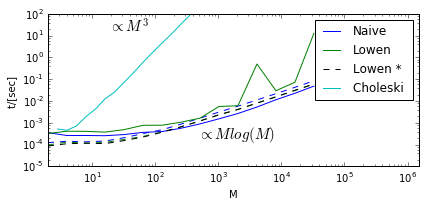

In [8]:
plt.figure(figsize=(6,3))
colors=['r','b','g','k','c',"burlywood",'b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
text1='\\propto M^3'
textneu='\propto N'
b=5*a1

text='\\propto M log(M)'
plt.text(10**4, 10**(-4), "$%s$  " %(text),verticalalignment='bottom', horizontalalignment='right', fontsize=15)
plt.text(10**2, 10**(1), "$%s$  " %(text1) ,verticalalignment='bottom', horizontalalignment='right', fontsize=15)

plt.loglog(a,time_python,label="Naive",c=colors[1])
plt.loglog(a,time_cpp,"--",c=colors[1])
plt.loglog(a,time_b,label="Lowen",c=colors[2])
plt.loglog(a,time_a,"--",c=colors[2])
plt.loglog(a,time_modif,"--",c=colors[3],label="Lowen *")
plt.loglog(aneu[1:],time_n,label="Choleski ",c=colors[4])

plt.ylabel('t/[sec] ', fontsize=10)
plt.xlabel('M',fontsize=10)
plt.xlim([0,1.5*10**6])

plt.legend(ncol=1, fontsize=12)
plt.savefig('results/nongaussiandouble1.png',dpi=300)
plt.tight_layout()


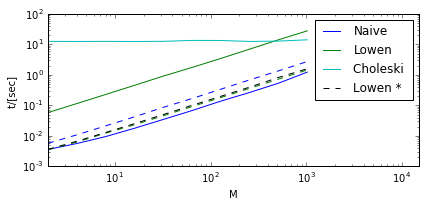

In [9]:
plt.figure(figsize=(6,3))
colors=['r','b','g','k','c',"burlywood",'b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']

plt.loglog(a1,time_python1,label="Naive",c=colors[1])
plt.plot(a1,time_cpp1,"--",c=colors[1])
plt.plot(a1,time_b1,label="Lowen",c=colors[2])
plt.plot(a1,time_a1,"--",c=colors[2])
plt.plot(a1[:len(time_n1)],time_n1,label="Choleski ",c=colors[4])
plt.loglog(a1,time_lowen_modified,"--",c=colors[3],label="Lowen *")
plt.ylabel('t/[sec] ', fontsize=10)
plt.xlabel('M',fontsize=10)
plt.xlim([0,1.5*10**4])

plt.legend(ncol=1, fontsize=12)
plt.savefig('results/nongaussiandouble2.png',dpi=300)
plt.tight_layout()



# Accuracy with Alpha 

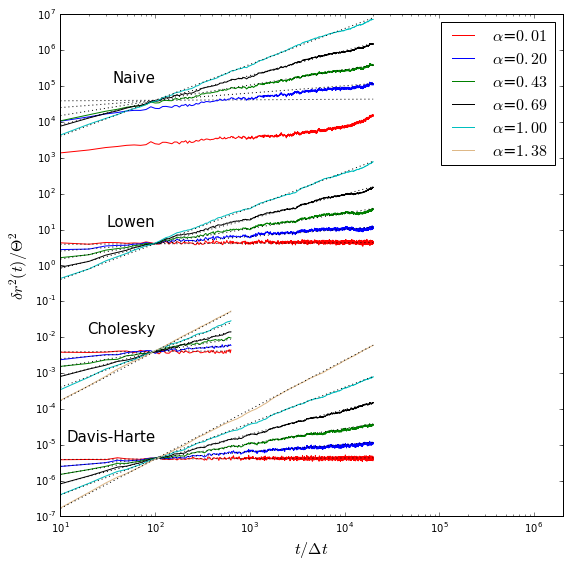

In [10]:
plt.figure(figsize=(9,9))
msd_text='MSD=2 K_\\alpha t^\\alpha'
t='t=\\Delta t \\cdot n'
coloin=-1
a=np.logspace(0.02,1.25,num=6,base=2)-1
a[4]=1
colors=['r','b','g','k','c',"burlywood",'b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.text(100, 10**5, 'Naive',verticalalignment='bottom', horizontalalignment='right', fontsize=15)
for i in a[:-1]:
    coloin=coloin+1
    e=analyse_fBm.Analyse(D=2,particles=400,length=2000,alpha=i,dt=0.1,version='naive_cpp')
    msd,std=e.msd_ensemble()
    plt.loglog(e.t/e.dt,10000*msd,color=colors[coloin])
    plt.loglog(e.t/e.dt,10000*e.msdanalyt(),":",color="k")


coloin=-1
plt.text(100, 10, 'Lowen',verticalalignment='bottom', horizontalalignment='right', fontsize=15)

for i in a[:-1]:
    coloin=coloin+1
    e=analyse_fBm.Analyse(D=2,particles=400,length=2000,alpha=i,dt=0.1,version='lowencpp')
    msd,std=e.msd_ensemble()
    plt.loglog(e.t/e.dt,1*msd,color=colors[coloin])
    plt.loglog(e.t/e.dt,1*e.msdanalyt(),":",color="k")



coloin=-1

plt.text(100, 10**(-2), 'Cholesky',verticalalignment='bottom', horizontalalignment='right', fontsize=15)

for i in a[:]:
    coloin=coloin+1
    e=analyse_fBm.Analyse(D=2,particles=400,length=128*1/2,alpha=i,dt=0.1,version='pseudo-cholesky')
    msd,std=e.msd_ensemble()
    plt.plot(e.t/e.dt,0.001*msd,color=colors[coloin])
    plt.loglog(e.t/e.dt,0.001*e.msdanalyt(),":",color="k")
    
coloin=-1

plt.text(100, 10**(-5), 'Davis-Harte',verticalalignment='bottom', horizontalalignment='right', fontsize=15)
for i in a[:]:
    coloin=coloin+1
    e=analyse_fBm.Analyse(D=2,particles=400,length=2000,alpha=i,dt=0.1,version='davis-harte')
    msd,std=e.msd_ensemble()
    plt.plot(e.t/e.dt,0.000001*msd,color=colors[coloin],label="$\\alpha $=$%.2f $" %(e.alpha))
    plt.loglog(e.t/e.dt,0.000001*e.msdanalyt(),":",color="k")

plt.xlim((0,2000000))

plt.legend( ncol=1,fontsize=16)

plt.xlabel('$t/ \Delta t$', fontsize=16)
plt.ylabel('$\delta r^{2}(t)/ \Theta^2$', fontsize=16)


plt.savefig('results/alpha_changethreeneu.png', bbox_inches='tight',dpi=300)
plt.show()

# Backward Forward Msd

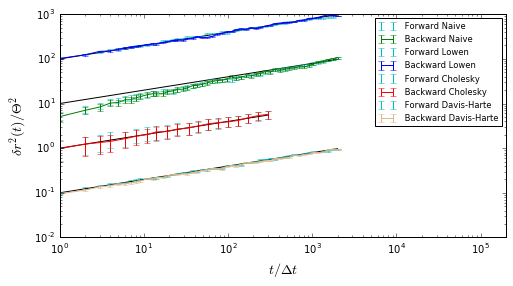

In [11]:
msd_text='2 K_\\alpha t^\\alpha'
t='t=\\Delta t \\cdot n'
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']



def gen_log_space(limit, n):
    result = [1]
    if n>1:  # just a check to avoid ZeroDivisionError
        ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    while len(result)<n:
        next_value = result[-1]*ratio
        if next_value - result[-1] >= 1:
            # safe zone. next_value will be a different integer
            result.append(next_value)
        else:
            # problem! same integer. we need to find next_value by artificially incrementing previous value
            result.append(result[-1]+1)
            ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    return np.array(map(lambda x: round(x)-1, result), dtype=np.uint64)

y = gen_log_space(2000, 50)
y1 = gen_log_space(300, 20)

def gamma(D,dt):
     return 2*D*dt

plt.figure(figsize=(8,4))
e=analyse_fBm.Analyse(D=20,particles=1000,length=2000,alpha=0.3,dt=1,version='naive_cpp')

msd,std=e.msd_ensemble()

plt.loglog(e.t,10*e.msdanalyt()/gamma(e.D,e.dt),color="k")
plt.errorbar(e.t[y], 10*msd[y]/gamma(e.D,e.dt),yerr=10*std[y]/gamma(e.D,e.dt), color="c",linestyle="",label= " Forward Naive" )
e.invert_time()
msd1,std1=e.msd_ensemble()
plt.errorbar(e.t[y], 10*msd1[y]/gamma(e.D,e.dt),yerr=10*std1[y]/gamma(e.D,e.dt), color="g",label= " Backward Naive" )

e=analyse_fBm.Analyse(D=200,particles=1000,length=2000,alpha=0.3,dt=1,version='lowencpp')

msd,std3=e.msd_ensemble()

plt.loglog(e.t,100*e.msdanalyt()/gamma(e.D,e.dt),color="k")
plt.errorbar(e.t[y], 100*msd[y]/gamma(e.D,e.dt),yerr=100*std3[y]/gamma(e.D,e.dt), color="c",linestyle="",label= " Forward Lowen" )
e.invert_time()
msd1,std4=e.msd_ensemble()
plt.errorbar(e.t[y], 100*msd1[y]/gamma(e.D,e.dt),yerr=100*std4[y]/gamma(e.D,e.dt), color="b",label= " Backward Lowen" )


e=analyse_fBm.Analyse(D=2,particles=1000,length=300,alpha=0.3,dt=1,version='pseudo-cholesky')
msd,std=e.msd_ensemble()

plt.loglog(e.t,1.0*e.msdanalyt()/gamma(e.D,e.dt),color="k")
plt.errorbar(e.t[y1], 1*msd[y1]/gamma(e.D,e.dt),yerr=1*std[y1]/gamma(e.D,e.dt), color="c",linestyle="",label= " Forward Cholesky" )
e.invert_time()
msd1,std1=e.msd_ensemble()
plt.errorbar(e.t[y1], 1*msd1[y1]/gamma(e.D,e.dt),yerr=1*std1[y1]/gamma(e.D,e.dt), color="r",label= " Backward Cholesky" )


e=analyse_fBm.Analyse(D=200,particles=1000,length=2000,alpha=0.3,dt=1.0,version='davis-harte')
msd,std=e.msd_ensemble()
plt.loglog(e.t/e.dt,0.1*e.msdanalyt()/gamma(e.D,e.dt),color="k")
plt.errorbar(e.t[y]/e.dt, 0.1*msd[y]/gamma(e.D,e.dt),yerr=0.1*std3[y]/gamma(e.D,e.dt), color="c",linestyle="",label= " Forward Davis-Harte" )
e.invert_time()
msd1,std1=e.msd_ensemble()
plt.errorbar(e.t[y], 0.1*msd1[y]/gamma(e.D,e.dt),yerr=0.1*std4[y]/gamma(e.D,e.dt), color="burlywood",label= " Backward Davis-Harte" )





plt.xlim((0,200000))

plt.xlabel('$t/ \Delta t$', fontsize=14)
plt.ylabel('$\delta r^{2}(t)/ \Theta^2$', fontsize=14)
lgd=plt.legend(  ncol=1,fontsize='small')
plt.savefig('results/changeintimenew.png', bbox_inches='tight',dpi=300)   # save the figure to file 

plt.show()

# Rescaled Function

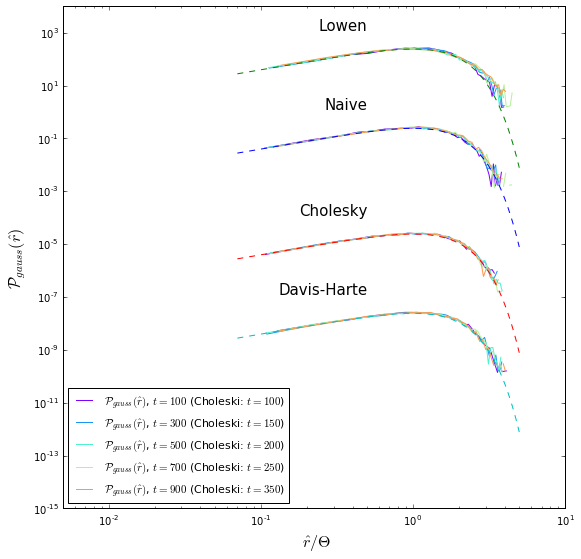

In [12]:
plt.figure(figsize=(9,9))

colornum=-1
length=1100
steps=5
shades=np.linspace(0,1,steps+1)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
plt.text(0.5, 1, 'Naive',verticalalignment='bottom', horizontalalignment='right', fontsize=15)
c=analyse_fBm.Analyse(D=0.2,particles=10000,length=length+1,alpha=0.5,dt=1,version="naive_cpp")
analt=c.rescaled_analytical_distribution(1,5)

for j in range(100,1100,1000/steps):
        colornum=1+colornum
        shade=shades[colornum]
        h=c.rescaled_function(t=j,histpoints=35)
        plt.loglog(h[0],h[1],color=next(colors))
plt.plot(analt[0],analt[1],"--")
plt.xlabel('$r_{res} \Gamma$ ', fontsize=14)


colornum=-1
index=0
length=1100
steps=5
shades=np.linspace(0,1,steps+1)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
choleskirange=[100,150,200,250,350]
c=analyse_fBm.Analyse(D=2,particles=10000,length=length+1,alpha=0.5,dt=1,version="lowen")
plt.text(0.5, 1000, 'Lowen',verticalalignment='bottom', horizontalalignment='right', fontsize=15)

for j in range(100,1100,1000/steps):   
        colornum=1+colornum
        shade=shades[colornum]
        h=c.rescaled_function(t=j,histpoints=35)
        plt.loglog(h[0],1000*h[1],color=next(colors))
        index=index+1
plt.plot(analt[0],1000*analt[1],"--")
plt.ylabel('$ \mathcal{P}_{gauss}(\hat{r}) $', fontsize=16)
plt.xlabel(' $ \hat{r}/ \Theta $ ', fontsize=16)


colornum=-1
length=1100
steps=5
shades=np.linspace(0,1,steps+1)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
plt.text(0.5, 0.0001, 'Cholesky',verticalalignment='bottom', horizontalalignment='right', fontsize=15)
c=analyse_fBm.Analyse(D=2,particles=10000,length=351,alpha=0.5,dt=1,version="pseudo-cholesky")
for j in [100,150,200,250,350]:
        colornum=1+colornum
        shade=shades[colornum]
        h=c.rescaled_function(t=j,histpoints=35)
        plt.loglog(h[0],0.0001*h[1],color=next(colors))
plt.loglog(analt[0],0.0001*analt[1],"--")

colornum=-1
index=0
length=1100
steps=5
shades=np.linspace(0,1,steps+1)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
choleskirange=[100,150,200,250,350]
plt.text(0.5, 0.0000001, 'Davis-Harte',verticalalignment='bottom', horizontalalignment='right', fontsize=15)

c=analyse_fBm.Analyse(D=2,particles=10000,length=length+1,alpha=0.5,dt=1,version="davis-harte")
for j in range(100,1100,1000/steps):   
        colornum=1+colornum
        shade=shades[colornum]
        h=c.rescaled_function(t=j,histpoints=35)
        plt.loglog(h[0],0.0000001*h[1],color=next(colors), label="$ \mathcal{P}_{gauss}(\hat{r}) $, $t=%d$ (Choleski: $t=%d$)" %(j,choleskirange[index]))
        index=index+1
plt.plot(analt[0],0.0000001*analt[1],"--")
plt.legend(loc=3,fontsize=11)

plt.xlim([0.5*10**(-2),10])
plt.ylim([10**(-15),10000])

plt.savefig('results/scaledfunctionneu12.png',bbox_inches='tight',dpi=300)
plt.show()

# Non-gaussian parameter

In [13]:
steps=30

gaussianparamter3=[]
for i in range(steps):
        print 3,i
        c=analyse_fBm.Analyse(D=2,particles=5000,length=100,alpha=0.5,dt=0.1,version="pseudo-cholesky")
        b=c.nongaussian_parameter()
        gaussianparamter3.append(b)
gaussianparamter3=np.array(gaussianparamter3)

3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29


analyse_fBm.py:121: RuntimeWarning: invalid value encountered in divide
  nongaussianparamter=(1/3.)*moment4/moment2poten2-1


2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
4 0


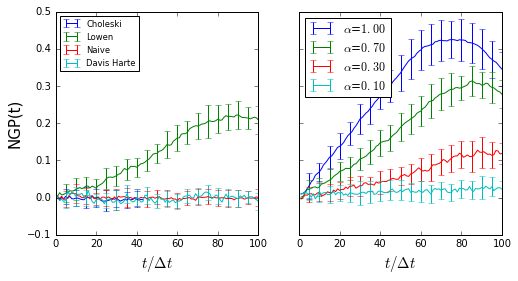

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True ,figsize=(8,4))

length=100
steps=30

for alpha in [1.0,0.7,0.3,0.1]:
    gaussianparamter2=[]
    msd_all=[]
    for i in range(steps):
            print 2,i
            c=analyse_fBm.Analyse(D=2,particles=5000,length=length+1,alpha=alpha,dt=1.0,version="lowen")
            b=c.nongaussian_parameter()
            gaussianparamter2.append(b)
            msd,std=c.msd_ensemble()
            msd_all.append(msd)
    msd_all=np.array(msd_all)        
    gaussianparamter2=np.array(gaussianparamter2)
    plt.errorbar(range(length+1), gaussianparamter2.mean(axis=0), yerr=gaussianparamter2.std(axis=0),errorevery=5,label="$\\alpha $=$%.2f $" %(c.alpha))

ax2.set_xlabel('$t/\Delta t$', fontsize=15)
ax2.legend(loc=2,fontsize=12)
plt.setp(ax2.get_yticklabels(), visible=False)



gaussianparamter1=[]
for i in range(steps):
        print 1,i
        c=analyse_fBm.Analyse(D=2,particles=5000,length=length+1,alpha=0.5,dt=0.1,version="naive_python")
        b=c.nongaussian_parameter()
        gaussianparamter1.append(b)
gaussianparamter1=np.array(gaussianparamter1)





gaussianparamter2=[]
for i in range(steps):
        print 2,i
        c=analyse_fBm.Analyse(D=2,particles=5000,length=length+1,alpha=0.5,dt=0.1,version="lowen")
        b=c.nongaussian_parameter()
        gaussianparamter2.append(b)
gaussianparamter2=np.array(gaussianparamter2)




gaussianparamter3=[]
for i in range(steps):
        print 3,i
        c=analyse_fBm.Analyse(D=2,particles=5000,length=356/8,alpha=0.5,dt=0.1,version="pseudo-cholesky")
        b=c.nongaussian_parameter()
        gaussianparamter3.append(b)
gaussianparamter3=np.array(gaussianparamter3)

gaussianparamter4=[]
for i in range(1):
        print 4,i
        c=analyse_fBm.Analyse(D=2,particles=20000,length=length+1,alpha=0.5,dt=0.1,version="davis-harte")
        b=c.nongaussian_parameter()
        gaussianparamter4.append(b)
gaussianparamter4=np.array(gaussianparamter4)


ax1.errorbar(range(356/8), gaussianparamter3.mean(axis=0), yerr=gaussianparamter3.std(axis=0),errorevery=5,label="Choleski")
ax1.errorbar(range(length+1), gaussianparamter2.mean(axis=0), yerr=gaussianparamter2.std(axis=0),errorevery=5,label="Lowen")
ax1.errorbar(range(length+1), gaussianparamter1.mean(axis=0), yerr=gaussianparamter1.std(axis=0),errorevery=5,label="Naive")
ax1.errorbar(range(length+1), gaussianparamter4.mean(axis=0), yerr=gaussianparamter1.std(axis=0),errorevery=5,label="Davis Harte")

ax1.set_xlabel('$t/\Delta t$', fontsize=15)
ax1.set_ylabel('NGP(t)', fontsize=15)
ax1.legend(loc=2,fontsize='small')
#ax1.set_title('b) $\\alpha_2(t)$  vs. Algorithms', fontsize=10)


#ax2.ylabel('t in sec',fontsize=10)
plt.savefig('results/nongaussianlowenalphaneu.png',dpi=300)
plt.show()
  # save the figure to file 

# make these tick labels invisible
#plt.set_setp(ax2.get_yticklabels(), visible=False)



plt.show()

# modified lowen

2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19


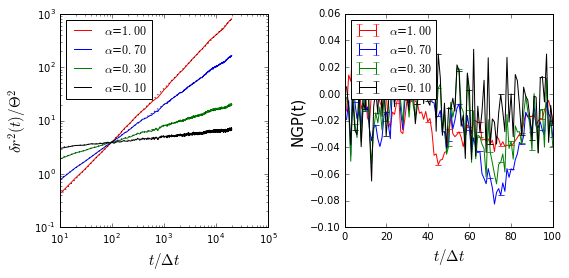

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(8,4))
colors=['r','b','g','k','c',"burlywood",'b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']

a=np.logspace(0.02,1.25,num=6,base=2)-1
a[4]=1
length=100
steps=20
coloin=-1
for alpha in [1.0,0.7,0.3,0.1]:
    gaussianparamter2=[]
    gaussianparamter6=[]
    coloin=coloin+1

    msd_all=[]
    for i in range(steps):
            print 2,i
            c=analyse_fBm.Analyse(D=2,particles=5000,length=length+1,alpha=alpha,dt=1.0,version="lowen_modified")
            b=c.nongaussian_parameter()
            gaussianparamter6.append(b)
    gaussianparamter6=np.array(gaussianparamter6)
    plt.errorbar(range(length+1), gaussianparamter6.mean(axis=0), yerr=gaussianparamter6.std(axis=0),errorevery=5,color=colors[coloin],label="$\\alpha $=$%.2f $" %(c.alpha))

ax2.set_xlabel('$t/\Delta t$', fontsize=15)
ax2.set_ylabel('NGP(t)', fontsize=15)
ax2.legend(loc=2,fontsize=12)

coloin=-1

for i in [1.0,0.7,0.3,0.1]:
    coloin=coloin+1
    e=analyse_fBm.Analyse(D=2,particles=2000,length=2000,alpha=i,dt=0.1,version='lowen_modified')
    msd,std=e.msd_ensemble()
    ax1.plot(e.t/e.dt,msd,color=colors[coloin],label="$\\alpha $=$%.2f $" %(e.alpha))
    ax1.loglog(e.t/e.dt,e.msdanalyt(),":",color="k")


ax1.set_xlabel('$t/ \Delta t$', fontsize=15)
ax1.set_ylabel('$\delta r^{2}(t)/ \Theta^2$', fontsize=15)

ax1.legend(loc=2,fontsize=12)

plt.tight_layout()
plt.savefig('results/nongaussianlowenalphaneumodifed.png',dpi=300)
plt.show()



plt.show()

# ensamble vs time average


2000
2000


/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/matplotlib/lines.py:558: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markevery != every:


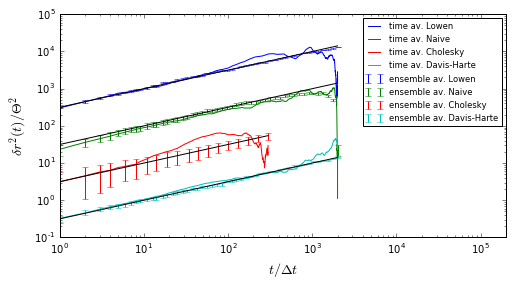

In [16]:

plt.figure(figsize=(8,4))

e=analyse_fBm.Analyse(D=200,particles=1000,length=2000,alpha=0.5,dt=0.1,version='lowencpp')
msd,std3=e.msd_ensemble()
d=analyse_fBm.Analyse(D=200,particles=1000,length=2000,alpha=0.5,dt=0.1,version='lowencpp')
msd1,std1=d.msd_time()

print len(msd)
print len(e.t[:])
plt.plot(e.t[:], 100*msd1[:]/gamma(e.D,e.dt),color="b",label="time av. Lowen")
plt.errorbar(d.t[y],100* msd[y]/gamma(e.D,e.dt) ,yerr=100*std3[y]/gamma(e.D,e.dt), color="b",linestyle="",markevery=y,label="ensemble av. Lowen")
plt.loglog(d.t,100*d.msdanalyt()/gamma(e.D,e.dt),color="k")


e=analyse_fBm.Analyse(D=20,particles=1000,length=2000,alpha=0.5,dt=0.1,version='python_notrick')
msd,std=e.msd_ensemble()
d=analyse_fBm.Analyse(D=20,particles=1000,length=2000,alpha=0.5,dt=0.1,version='python_notrick')
msd1,std1=d.msd_time()

msd_text='MSD=2 K_\\alpha t^\\alpha'

plt.plot(e.t[:],10*msd1[:]/gamma(e.D,e.dt),color="g",label="time av. Naive")
plt.errorbar(d.t[y], 10*msd[y]/gamma(e.D,e.dt),yerr=10*std[y]/gamma(e.D,e.dt), color="g",linestyle="",label="ensemble av. Naive")
plt.loglog(d.t,10*d.msdanalyt()/gamma(e.D,e.dt), color="k")

e=analyse_fBm.Analyse(D=2,particles=1000,length=300,alpha=0.5,dt=0.1,version='pseudo-cholesky')
msd,std=e.msd_ensemble()
d=analyse_fBm.Analyse(D=2,particles=1000,length=300,alpha=0.5,dt=0.1,version='pseudo-cholesky')
msd1,std1=d.msd_time()


plt.plot(e.t[:], 1*msd1[:]/gamma(e.D,e.dt), color="r",label="time av. Cholesky")
plt.errorbar(d.t[y1], 1*msd[y1]/gamma(e.D,e.dt) ,yerr=1*std[y1]/gamma(e.D,e.dt), color="r",linestyle="",label="ensemble av. Cholesky")
plt.loglog(d.t,1*d.msdanalyt()/gamma(e.D,e.dt),color="k")


e=analyse_fBm.Analyse(D=100,particles=1000,length=2000,alpha=0.5,dt=0.1,version='davis-harte')
msd,std=e.msd_ensemble()
d=analyse_fBm.Analyse(D=100,particles=1000,length=2000,alpha=0.5,dt=0.1,version='davis-harte')
msd1,std1=d.msd_time()


plt.plot(e.t[:],0.1*msd1[:]/gamma(e.D,e.dt), color="c",label="time av. Davis-Harte")
plt.errorbar(d.t[y], 0.1*msd[y]/gamma(e.D,e.dt) ,color="c",linestyle="",yerr=0.1*std3[y]/gamma(e.D,e.dt), label="ensemble av. Davis-Harte")
plt.loglog(d.t,0.1*d.msdanalyt()/gamma(e.D,e.dt),color="k")


plt.xlim((0,200000))

plt.xlabel('$t/ \Delta t$', fontsize=14)
plt.ylabel('$\delta r^{2}(t)/ \Theta^2$', fontsize=14)
lgd=plt.legend(  ncol=1,fontsize='small')

plt.savefig('results/timevsensambenew.png',bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=300)   # save the figure to file 

plt.show()